In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, metrics
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## Problem Statement

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

Dependent Variable = Loan Status

In [2]:
test = pd.read_csv('data/test.csv')
train = pd.read_csv('data/train.csv')

train_og = train.copy() 
test_og = test.copy()

In [3]:
#combine datasets
train['file']='train'
test['file']='test'

data = pd.concat([train, test],ignore_index=True, sort=True)
print(data.shape)
print(list(data.columns))

(981, 14)
['ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'Dependents', 'Education', 'Gender', 'LoanAmount', 'Loan_Amount_Term', 'Loan_ID', 'Loan_Status', 'Married', 'Property_Area', 'Self_Employed', 'file']


In [4]:
data.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,file
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No,train
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No,train
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes,train
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No,train
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No,train


## Data Exploration

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    981 non-null    int64  
 1   CoapplicantIncome  981 non-null    float64
 2   Credit_History     902 non-null    float64
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Gender             957 non-null    object 
 6   LoanAmount         954 non-null    float64
 7   Loan_Amount_Term   961 non-null    float64
 8   Loan_ID            981 non-null    object 
 9   Loan_Status        614 non-null    object 
 10  Married            978 non-null    object 
 11  Property_Area      981 non-null    object 
 12  Self_Employed      926 non-null    object 
 13  file               981 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 107.4+ KB


In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
count,981.000000,981.000000,902.000000,954.000000,961.000000
mean,5179.795107,1601.916330,0.835920,142.511530,342.201873
std,5695.104533,2718.772806,0.370553,77.421743,65.100602
min,0.000000,0.000000,0.000000,9.000000,6.000000
25%,2875.000000,0.000000,1.000000,100.000000,360.000000
50%,3800.000000,1110.000000,1.000000,126.000000,360.000000
75%,5516.000000,2365.000000,1.000000,162.000000,360.000000
max,81000.000000,41667.000000,1.000000,700.000000,480.000000


### Target Variable
- Loan_Status

In [7]:
data.Loan_Status.value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [8]:
data['Loan_Status'].replace('N', 0,inplace=True) 
data['Loan_Status'].replace('Y', 1,inplace=True)

### Categorical Variables
- Credit History, Gender, Married, Self_Employed

In [9]:
print(data.Gender.value_counts(normalize=True))
print('Null Count = ', data.Gender.isnull().sum())

Male      0.809822
Female    0.190178
Name: Gender, dtype: float64
Null Count =  24


In [10]:
print(data.Credit_History.value_counts(normalize=True))
print('Null Count = ', data.Credit_History.isnull().sum())

1.0    0.83592
0.0    0.16408
Name: Credit_History, dtype: float64
Null Count =  79


In [11]:
print(data.Self_Employed.value_counts(normalize=True))
print('Null Count = ', data.Self_Employed.isnull().sum())

No     0.87149
Yes    0.12851
Name: Self_Employed, dtype: float64
Null Count =  55


In [12]:
print(data.Married.value_counts(normalize=True))
print('Null Count = ', data.Married.isnull().sum())

Yes    0.645194
No     0.354806
Name: Married, dtype: float64
Null Count =  3


#### Replacing Null values

In [13]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True) 
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)

data.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents            25
Education              0
Gender                 0
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed          0
file                   0
dtype: int64

#### Ordinal Variables
- Education, Dependents, Property_Area

Graduate        0.777778
Not Graduate    0.222222
Name: Education, dtype: float64
Null Count =  0


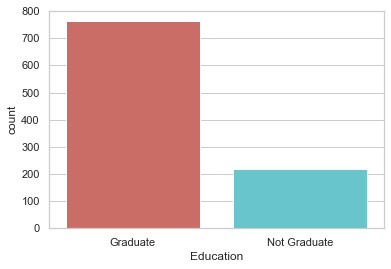

In [14]:
print(data.Education.value_counts(normalize=True))
print('Null Count = ', data.Education.isnull().sum())

sns.countplot(x='Education',data=data, palette='hls')
plt.show()

0     0.570084
1     0.167364
2     0.167364
3+    0.095188
Name: Dependents, dtype: float64
Null Count =  25


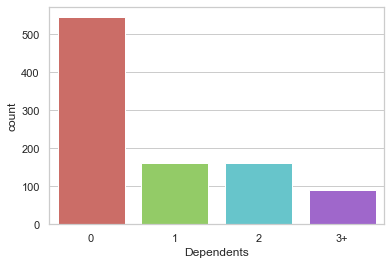

In [15]:
print(data.Dependents.value_counts(normalize=True))
print('Null Count = ', data.Dependents.isnull().sum())

sns.countplot(x='Dependents',data=data, palette='hls')
plt.show()

Semiurban    0.355759
Urban        0.348624
Rural        0.295617
Name: Property_Area, dtype: float64
Null Count =  0


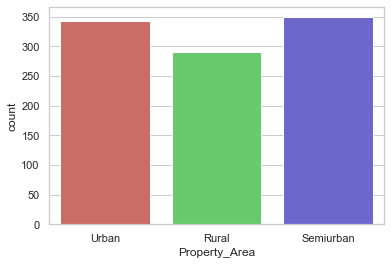

In [16]:
print(data.Property_Area.value_counts(normalize=True))
print('Null Count = ', data.Property_Area.isnull().sum())

sns.countplot(x='Property_Area',data=data, palette='hls')
plt.show()

#### Replacing Null values

In [17]:
data['Dependents'].replace('3+', 3,inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)

data.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents             0
Education              0
Gender                 0
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed          0
file                   0
dtype: int64

#### Numerical Variables
- ApplicantIncome, CoapplicantIncome, LoanAmount

Null Count =  0


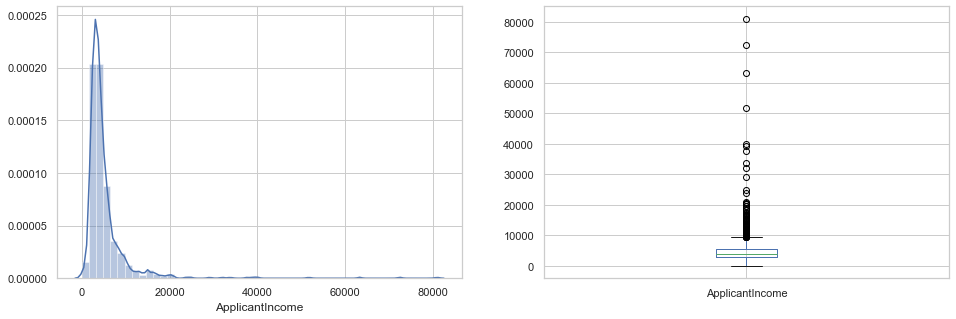

In [18]:
print('Null Count = ', data.ApplicantIncome.isnull().sum())

plt.figure(1) 
plt.subplot(121)
sns.distplot(data['ApplicantIncome']);

plt.subplot(122)
data['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

Null Count =  0


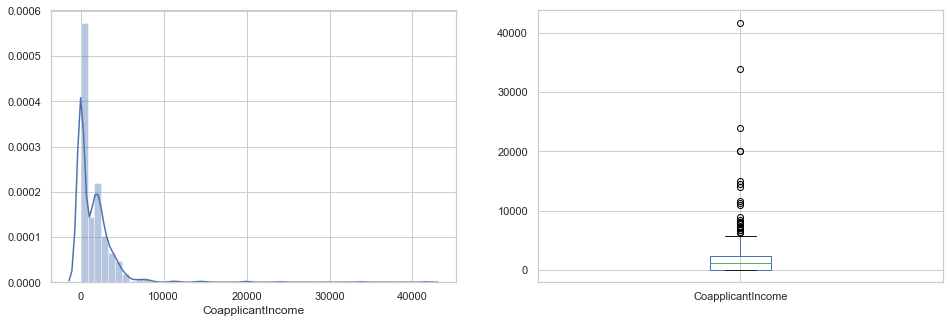

In [19]:
print('Null Count = ', data.CoapplicantIncome.isnull().sum())

plt.figure(1) 
plt.subplot(121) 
sns.distplot(data['CoapplicantIncome']); 

plt.subplot(122) 
data['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

Null Count =  27


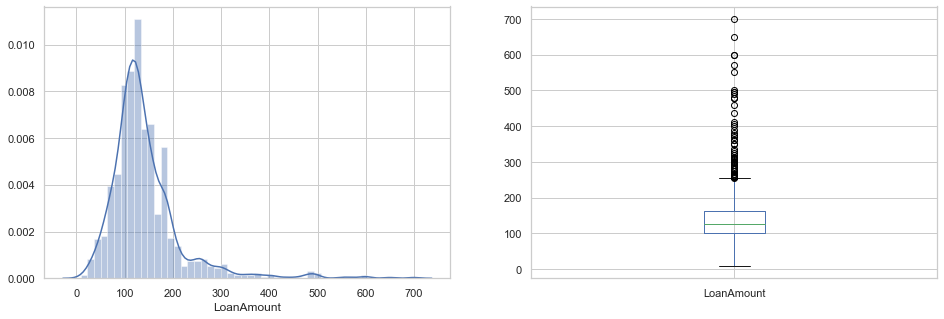

In [20]:
print('Null Count = ', data.LoanAmount.isnull().sum())

plt.figure(1) 
plt.subplot(121) 
sns.distplot(data['LoanAmount']); 

plt.subplot(122) 
data['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

#### Replacing Null values

In [21]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

data.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents             0
Education              0
Gender                 0
LoanAmount             0
Loan_Amount_Term       0
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed          0
file                   0
dtype: int64

#### Normalizing LoanAmount

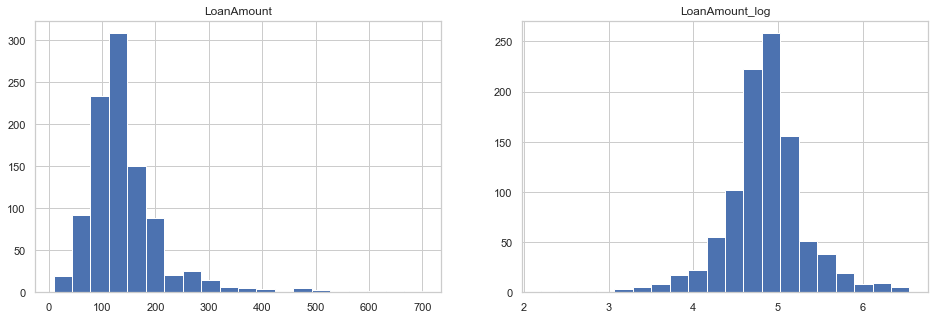

In [22]:
plt.figure(1) 
plt.subplot(121, title='LoanAmount') 
data['LoanAmount'].hist(bins=20)

plt.subplot(122, title='LoanAmount_log') 
data['LoanAmount_log'] = np.log(data['LoanAmount'])
data['LoanAmount_log'].hist(bins=20, figsize=(16,5))
plt.show()

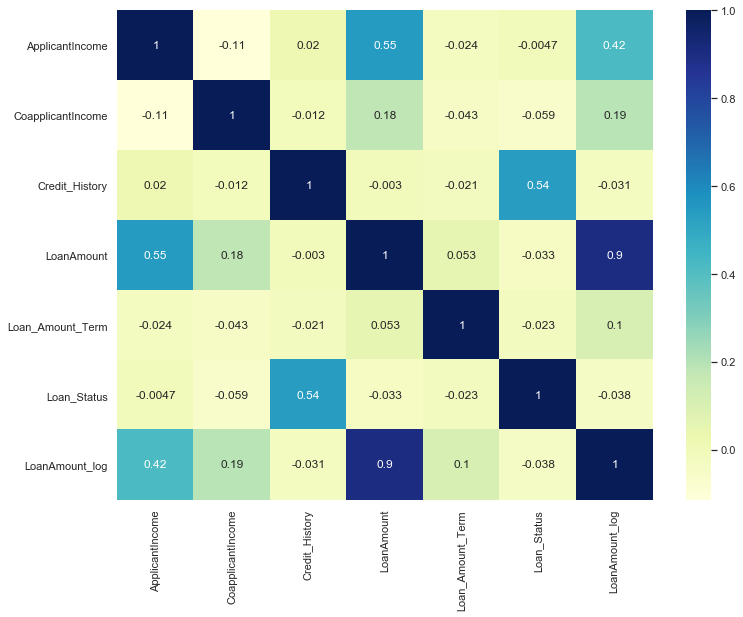

In [23]:
matrix = data.corr() 
f, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(matrix, annot=True, cmap="YlGnBu");

In [24]:
data = data.drop('Loan_ID',axis=1) 
#data = data.drop(['Loan_ID','Loan_Status'],1)


#### Split back into test and train files

In [25]:
train = data.loc[data['file']=='train']
test = data.loc[data['file']=='test']
test = test.drop('Loan_Status',1)

In [26]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

In [27]:
X = pd.get_dummies(X) 
train = pd.get_dummies(train) 
test = pd.get_dummies(test)

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3)

In [29]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

model = LogisticRegression() 
model.fit(x_train, y_train)

LogisticRegression(
    C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', 
    n_jobs=1,penalty='l2', random_state=1, solver='liblinear', tol=0.0001, verbose=0, warm_start=False
)

/Users/trevor.reynak/python-projects/stats/3envname/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [30]:
pred_cv = model.predict(x_cv)

In [31]:
accuracy_score(y_cv,pred_cv)

0.7567567567567568

In [32]:
pred_test = model.predict(test)

In [33]:
submission = {}
submission['Loan_Status']=pred_test
Loan_IDs = list(test_og['Loan_ID'])
submission['Loan_ID'] = Loan_IDs

In [34]:
submission_df = pd.DataFrame(submission)
submission_df

,Loan_Status,Loan_ID
0,1.0,LP001015
1,1.0,LP001022
2,1.0,LP001031
3,1.0,LP001035
4,1.0,LP001051
...,...,...
362,1.0,LP002971
363,1.0,LP002975
364,1.0,LP002980
365,1.0,LP002986


In [35]:
submission_df['Loan_Status'].replace(0, 'N',inplace=True) 
submission_df['Loan_Status'].replace(1, 'Y',inplace=True)

In [36]:
submission_df.to_csv('model_submission.csv')

In [37]:
from sklearn.model_selection import StratifiedKFold
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1 

pred_test = model.predict(test) 
pred=model.predict_proba(xvl)[:,1]

/Users/trevor.reynak/python-projects/stats/3envname/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/trevor.reynak/python-projects/stats/3envname/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:



1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8211382113821138

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.8032786885245902


/Users/trevor.reynak/python-projects/stats/3envname/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/trevor.reynak/python-projects/stats/3envname/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:


The mean validation accuracy for this model turns out to be 0.81. Let us visualize the roc curve.

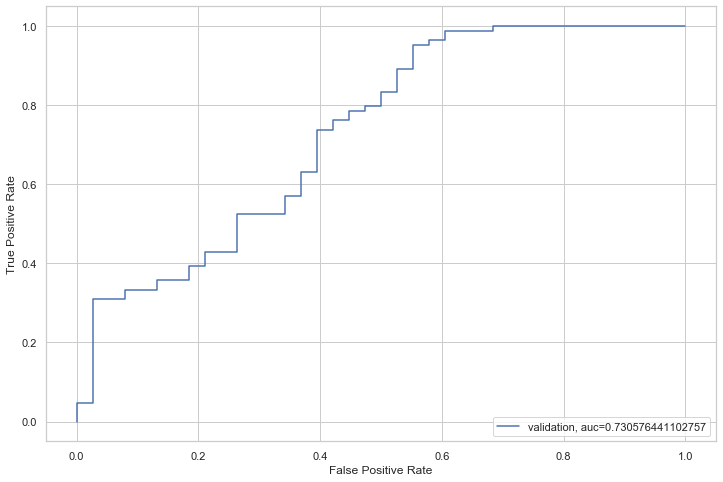

In [38]:
from sklearn import metrics 

fpr, tpr, _ = metrics.roc_curve(yvl,  pred) 
auc = metrics.roc_auc_score(yvl, pred) 

plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

### Decsion Tree Model

In [39]:
from sklearn import tree

i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = tree.DecisionTreeClassifier(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 

pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.6910569105691057

2 of kfold 5
accuracy_score 0.6747967479674797

3 of kfold 5
accuracy_score 0.7154471544715447

4 of kfold 5
accuracy_score 0.7479674796747967

5 of kfold 5
accuracy_score 0.680327868852459


The mean validation accuracy for this model is 0.69

### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 

for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=10)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8292682926829268

3 of kfold 5
accuracy_score 0.8048780487804879

4 of kfold 5
accuracy_score 0.7967479674796748

5 of kfold 5
accuracy_score 0.7704918032786885


The mean validation accuracy for this model is 0.766